In [119]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

%store -r races
%store -r races2
#ordered race & nonhispanic/hispanic data based on frequency in general US population -
# generated from ../dp/create_all_usdistribution.csv
real_order = [124, 116, 118, 123, 115, 117, 125, 51, 59, 111, 32, 102, 
              108, 42, 62, 37, 99, 44, 103, 48, 26, 96, 31, 106, 95, 
              45, 105, 38, 41, 107, 119, 97, 33, 43, 30, 94, 13, 79, 
              15, 83, 80, 27, 29, 12, 88, 76, 11, 78, 4, 17, 81, 75, 
              19, 74, 14, 6, 67, 68, 1, 10, 65, 5, 64, 63, 0, 66, 69, 
              71, 70, 2, 73, 8, 7, 84, 3, 72, 91, 77, 85, 20, 82, 21,
              24, 9, 18, 28, 104, 22, 110, 87, 25, 86, 89, 92, 35, 90,
              40, 36, 100, 50, 47, 16, 93, 39, 23, 98, 34, 56, 114, 57, 
              101, 113, 54, 46, 52, 49, 60, 55, 120, 53, 58, 109, 112, 61, 122, 121]

In [106]:
##########################################################################################################################3
#This file compares original dataset and datasets deidentiied using a DP mechanism 
#INPUT:
# county: county name for original dataset
# file: filename for deidentified DP dataset
#include_hispanic: boolean for whether to graph for only race or for race (63 possible vals) & hispanic origin 
        #(126 possible vals)
#OUTPUT:
#bar graph of spread of representation for both original and deidentified datasets provided
##########################################################################################################################3

def make_dp(county, file, include_hispanic):
    
    
    #read in original county block dataset
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    #transfer race representation to include hispanic data:
        #if not hispanic: index is 0-62
        #if hispanic: index is 63-126
            #so, if hispanic, add 63 to the existing race value 
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+len(races)
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
            
            
    #get list of occurrences by race using counter - original dataset
    #LABELS_ALL = race numbers 0-126
    #VALUES_ALL = associated counts for race numbers 0-126        
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            #for each race&hisp value, get number of occurences and append label and value of each
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    
    
    #df2 = dataframe corresponding to new dataset, with 63 rows (for each race) and 2 cols (for H/NH)
    df2 = pd.read_csv(file)    
    hisp = df2['Hispanic'].tolist()
    nonhisp = df2['Nonhispanic'].tolist()
    
    if include_hispanic == True:
        #labels for full list of race & h/nh occurences
        labels_all = np.arange(0,len(real_order),1)
        #full list of race & h/nh occurences
        nonhisp.extend(hisp)
        vals2_all = nonhisp
        #format graph appropriately
        x = np.arange(len(real_order))*4
        indexes_all = np.arange(0,len(real_order),1)
    
    else:
        #labels for full list of race only occurences
        labels_all = np.arange(0,len(races), 1)
        #full list of race occurences only
        vals2_all = []
        for i in range(0, len(hisp)): 
            vals2_all.append(hisp[i]+nonhisp[i])
        #format graph appropriately
        x = np.arange(len(races))*4
        indexes_all = np.arange(0,len(races),1)
        
            
    #display figure
    f = plt.figure()
    f.set_figwidth(25)           
    ax1 = plt.subplot(1,1,1) 
    w = 1.25
    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='DP')
    ax1.legend()
    ax1.set_yscale("log")




In [111]:
##########################################################################################################################3
#This file compares original dataset and datasets deidentiied using a swapping mechanism 
#INPUT:
# county: county name for original dataset
# file: filename for deidentified swapping dataset
#include_hispanic: boolean for whether to graph for only race or for race (63 possible vals) & hispanic origin 
        #(126 possible vals)
#OUTPUT:
#bar graph of spread of representation for both original and deidentified datasets provided
##########################################################################################################################3
def make_swap(county, file, include_hispanic):
    
    #ORIGINAL DATA
    
    #import original dataset & delete unnecessary rows
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)+len(races)
        #else, 0-63 range
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)
    
    
    #get list of occurrences by race using counter - original dataset
    #LABELS_ALL = race numbers 0-126
    #VALUES_ALL = associated counts for race numbers 0-126
    labels_all = []
    vals_all = []
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            #for each race value, get number of occurences and append label and value of each
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,len(real_order),1)
    
    #SWAPPING DATA
    
    #import original dataset & delete unnecessary rows
    df2 = pd.read_csv(file)
    for index, row in df2.iterrows():
        d = row['race']
        if isinstance(d,str):
            df2.at[index, 'race'] = races2.index(d)
    #replace race w/ value 0-126; where 0-62 represent non-hispanic and 63-126 represent hispanic
    for index, row in df2.iterrows():
        d = row['race']
        h = row['hispanic']
        #if hispanic, increment to 63-126 range
        #0-62 represent non-hispanic and 63-126 represent hispanic
        if h==1:
            df2.at[index, 'race'] = d+len(races)
    

    #get list of occurrences by race using counter - de-identified swapping dataset
    #LABELS2_ALL = race numbers 0-126
    #VALUES2_ALL = associated counts for race numbers 0-126
    labels2_all = []
    vals2_all = []    
    for key, value in df2.iteritems():
        if(key == 'race'):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, len(real_order)):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
                    
    if include_hispanic == True:
        #labels for full list of race & h/nh occurences
        labels_all = np.arange(0,len(real_order),1)
        #format graph appropriately
        x = np.arange(len(real_order))*4
        indexes_all = np.arange(0,len(real_order),1)
    
    else:
        #labels for full list of race only occurences
        labels_all = np.arange(0,len(races), 1)
        #make full list for race occurences only
        for i in range(0, len(vals_all)): 
            if i>=len(races):
                vals_all[i-len(races)] = vals_all[i-len(races)] + vals_all[i]
        vals_all = vals_all[0:len(races)]
        #make full list of race occurences only
        for i in range(0, len(vals2_all)): 
            if i>=len(races):
                vals2_all[i-len(races)] = vals2_all[i-len(races)] + vals2_all[i]
        vals2_all = vals2_all[0:len(races)]
        #format graph appropriately
        x = np.arange(len(races))*4
        indexes_all = np.arange(0,len(races),1)              
                    
                    
#     print(labels_all)
#     print(vals_all)
#     print(vals2_all)
                    
    f = plt.figure()
    f.set_figwidth(25)           
    x = np.arange(126)*4
    ax1 = plt.subplot(1,1,1) 
    w = 1.25

    plt.xticks(x, indexes_all, rotation='vertical')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes_all+1, vals2_all, width=w, color='orange', align='center', label='Swapping')
    ax1.legend()
#     ax1.set_yscale("log")
  

In [ ]:









################################################### RUNNING THE CODE #####################################################











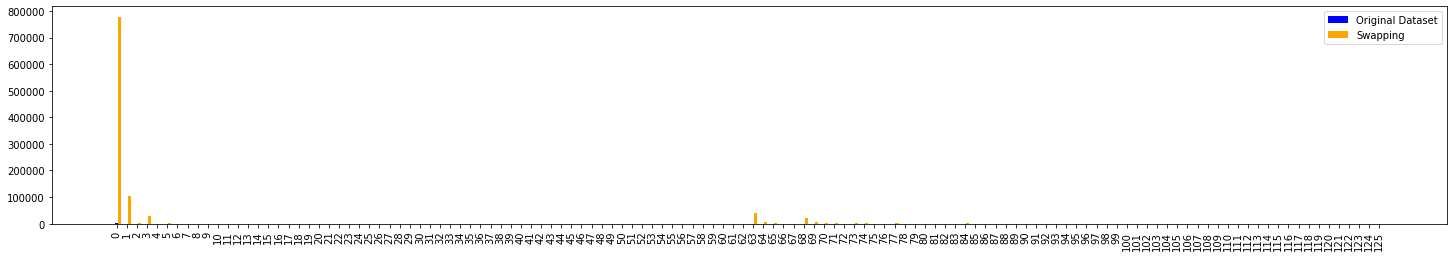

In [112]:
make_swap('armstrong', '../swapping/state_data/pennsylvania.csv')

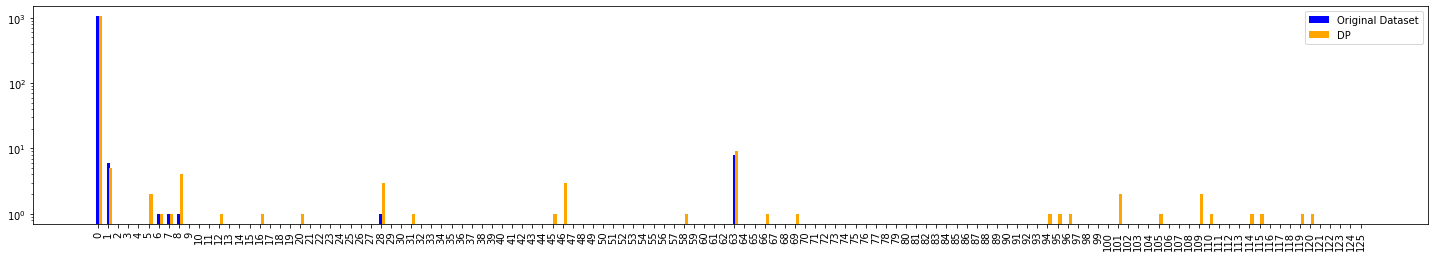

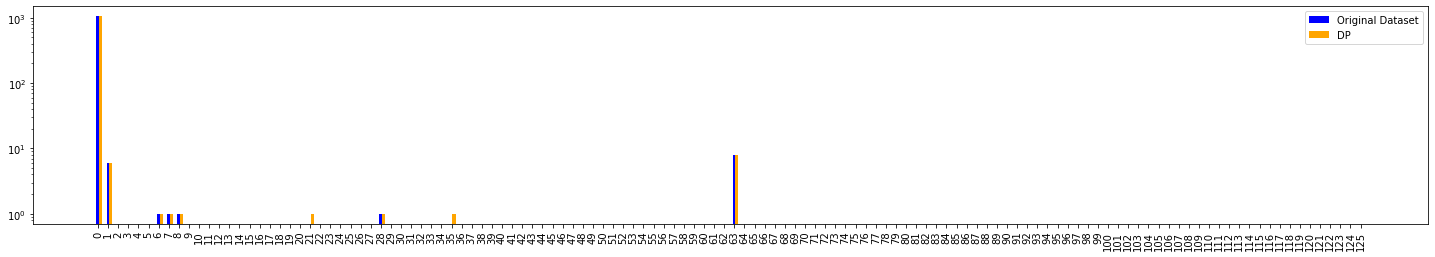

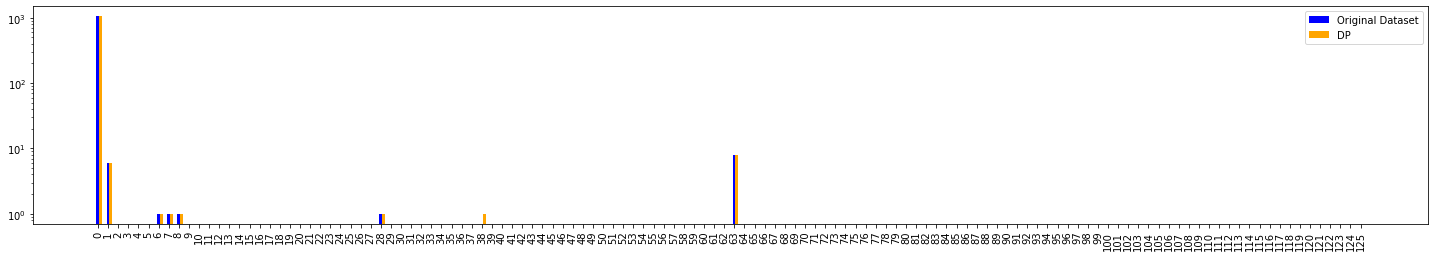

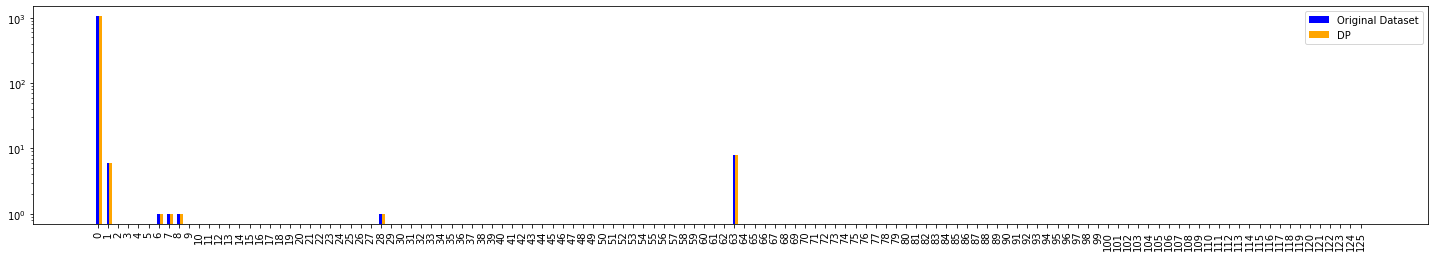

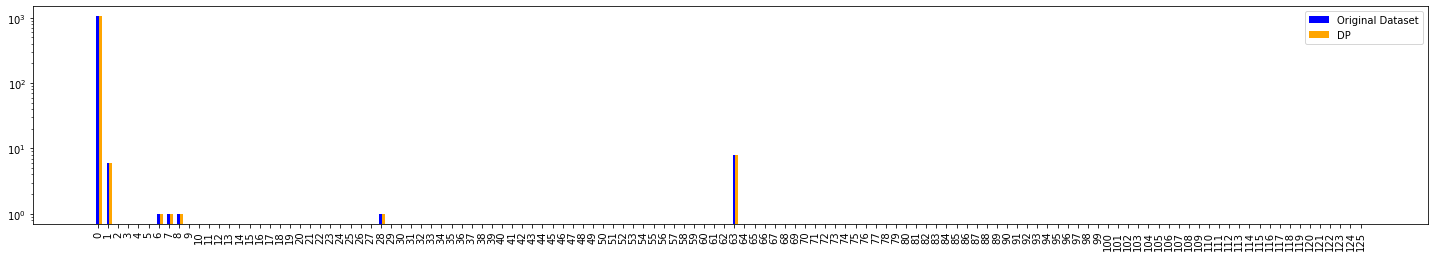

In [107]:
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_1.96_91.csv', True)
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_3.96_91.csv', True)    
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_5.96_91.csv', True)
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_7.96_91.csv', True)    
make_dp('armstrong', '../dp/newdp_runs2/armstrong/dprun_9.96_91.csv', True)

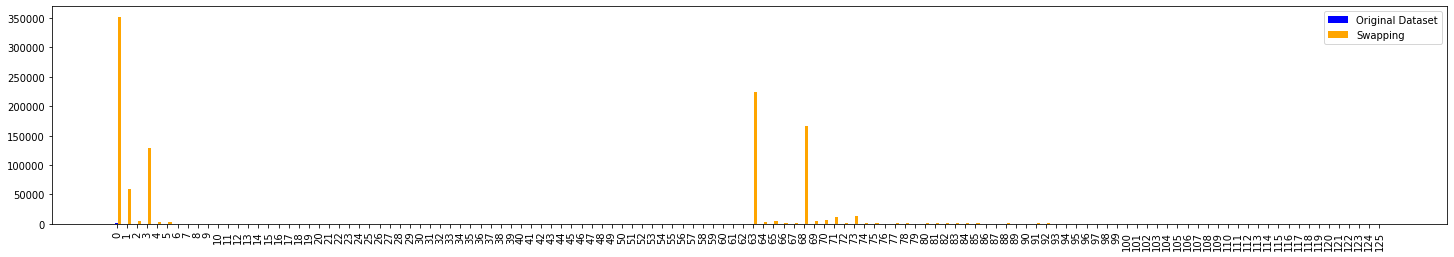

In [117]:
make_swap('alameda', '../swapping/state_data/california.csv', True)


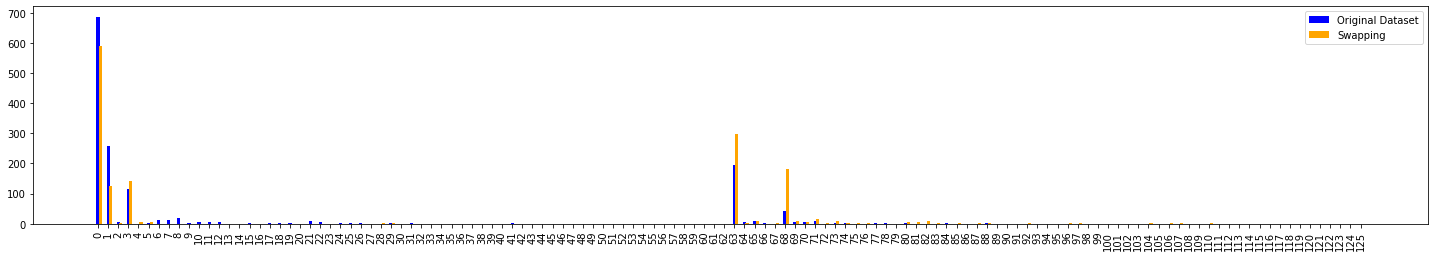

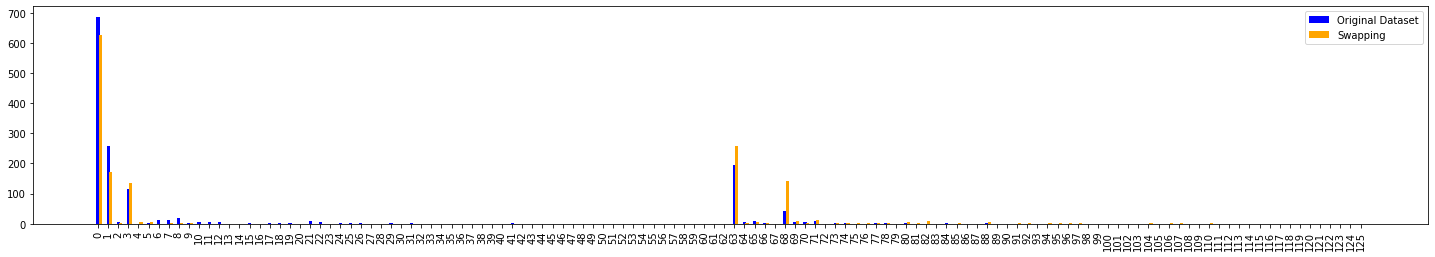

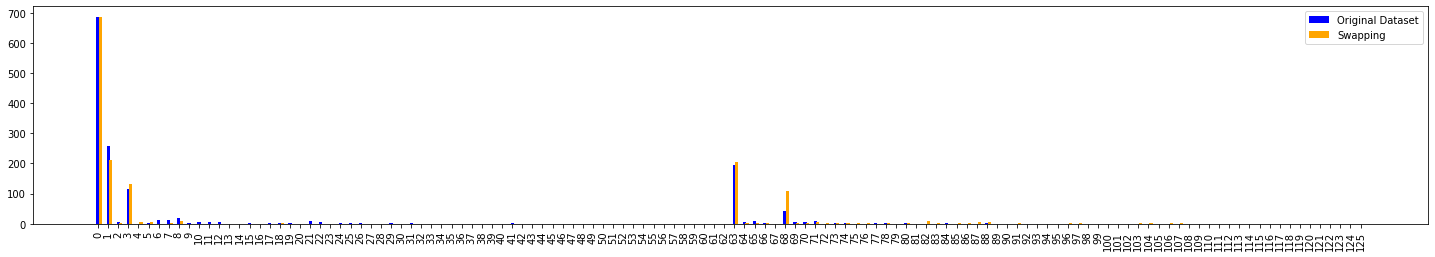

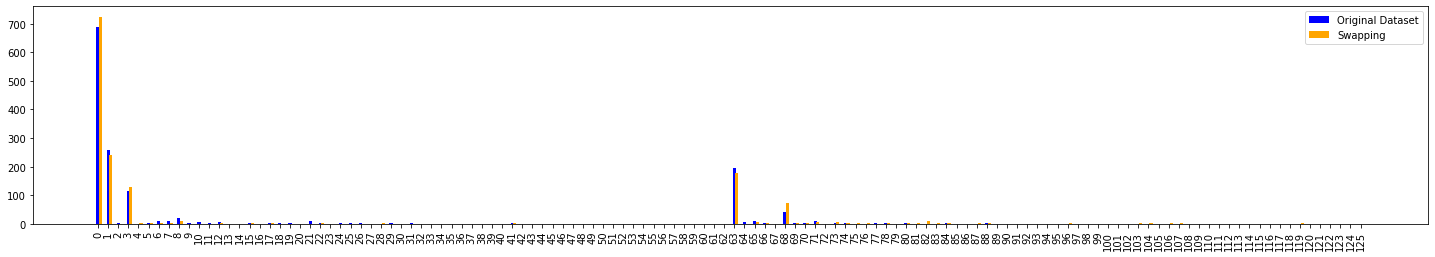

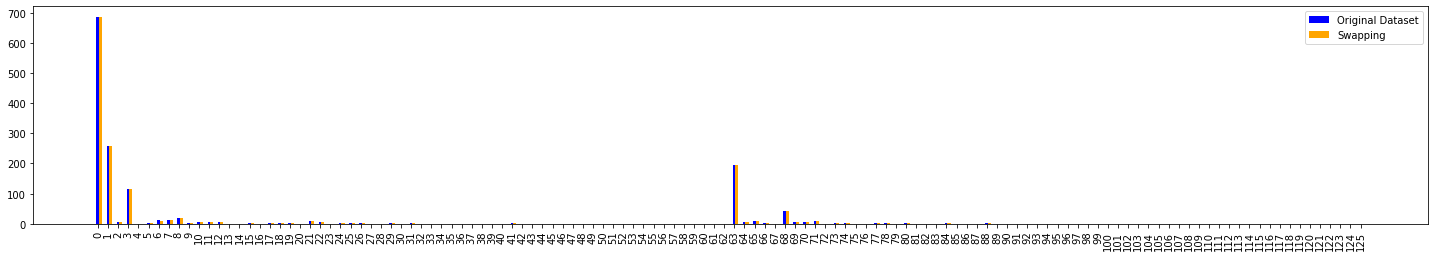

In [118]:
# make_swap('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.91_a1.csv', True)
# make_swap('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.76_a1.csv', True)
# make_swap('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.51_a1.csv', True)
# make_swap('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.36000000000000004_a1.csv', True)
# make_swap('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.11_a1.csv', True)
# make_swap('armstrong', '../swapping/swap_runs3/armstrong/similar/swap_0.01_a1.csv', True)

make_swap('alameda', '../swapping/swap_runs/alameda/similar/swap_0.81_0.csv', True)
make_swap('alameda', '../swapping/swap_runs/alameda/similar/swap_0.6100000000000001_0.csv', True)
make_swap('alameda', '../swapping/swap_runs/alameda/similar/swap_0.41000000000000003_0.csv', True)
make_swap('alameda', '../swapping/swap_runs/alameda/similar/swap_0.21000000000000002_0.csv', True)
make_swap('alameda', '../swapping/swap_runs/alameda/similar/swap_0.01_0.csv', True)